# Fraud Transaction Detection

In [1]:
"""This project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud."""

'This project aims to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_recall_curve,
    roc_curve,
    )
import warnings
warnings.filterwarnings("ignore")

# 1. Data Loading

In [3]:
def load_data(dataset):
    """
    Load the dataset from a CSV file and return the DataFrame.
    """
    return pd.read_csv(dataset)

dataset_path = "fraud_analysis_dataset.csv"
data = load_data(dataset_path)

# 2. Data Exploration

In [4]:
def data_overview(data):
    """
    Print basic information and summary statistics of the dataset.
    """
    print("Dataset Overview:")
    print(data.info())
    print("\nSummary Statistics:")
    print(data.describe())
    
data_overview(data)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None

Summary Statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.1

In [5]:
def check_missing_values(data):
    """
    Check for missing values in the dataset and return the count of missing values.
    """
    return data.isnull().sum()

check_missing_values(data)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [6]:
def check_duplicated_rows(data):
    """
    Check for duplicated rows in the dataset and return the count of duplicated rows.
    """
    return data.duplicated().sum()

check_duplicated_rows(data)

0

In [7]:
"""Data are cleaned It has no missing values and duplicates."""

'Data are cleaned It has no missing values and duplicates.'

# 3. EDA and visualization


Fraudulent vs Non-Fraudulent Transactions:
 isFraud
0    10000
1     1142
Name: count, dtype: int64


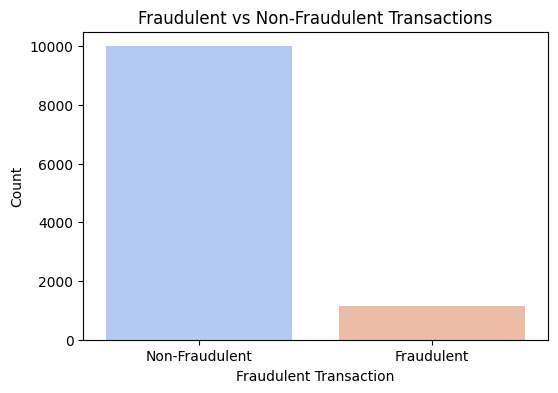

In [8]:
def plot_fraud_distribution(data):
    """
    Plot the distribution of fraudulent vs non-fraudulent transactions.
    """
    fraud_counts = data['isFraud'].value_counts()
    print("\nFraudulent vs Non-Fraudulent Transactions:\n", fraud_counts)

    plt.figure(figsize=(6, 4))
    sns.countplot(x='isFraud', data=data, palette='coolwarm')
    plt.title("Fraudulent vs Non-Fraudulent Transactions")
    plt.xlabel("Fraudulent Transaction")
    plt.ylabel("Count")
    plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
    plt.show()
    
plot_fraud_distribution(data)


Transaction Types Distribution:
 type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64


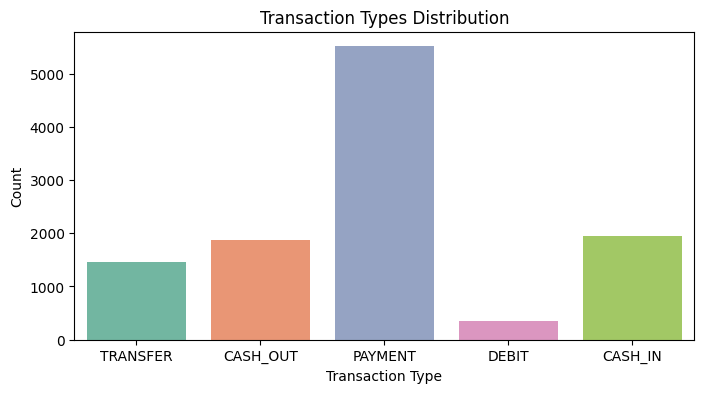

In [9]:
def plot_transaction_types(data):
    """
    Plot the distribution of transaction types.
    """
    transaction_types = data['type'].value_counts()
    print("\nTransaction Types Distribution:\n", transaction_types)

    plt.figure(figsize=(8, 4))
    sns.countplot(x='type', data=data, palette='Set2')
    plt.title("Transaction Types Distribution")
    plt.xlabel("Transaction Type")
    plt.ylabel("Count")
    plt.show()
    
plot_transaction_types(data)


Fraud Distribution by Transaction Type:
 type
CASH_IN     0.000000
CASH_OUT    0.308926
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.385246
Name: isFraud, dtype: float64


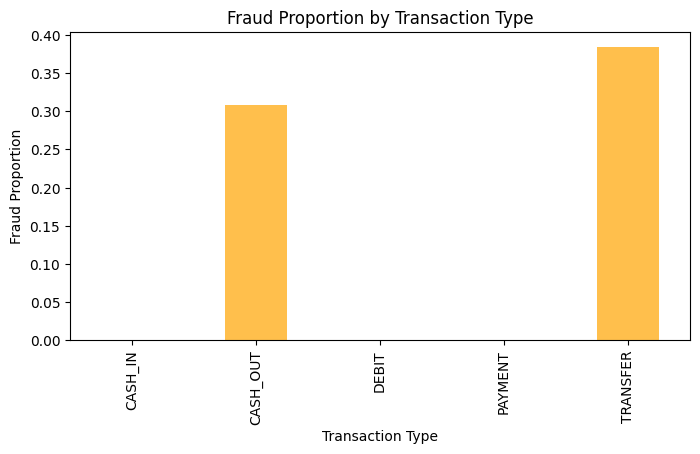

In [10]:
def plot_fraud_by_transaction_type(data):
    """
    Plot the proportion of fraud by transaction type.
    """
    fraud_by_type = data.groupby('type')['isFraud'].mean()
    print("\nFraud Distribution by Transaction Type:\n", fraud_by_type)

    plt.figure(figsize=(8, 4))
    fraud_by_type.plot(kind='bar', color='orange', alpha=0.7)
    plt.title("Fraud Proportion by Transaction Type")
    plt.xlabel("Transaction Type")
    plt.ylabel("Fraud Proportion")
    plt.show()
    
plot_fraud_by_transaction_type(data)


Descriptive statistics for fraudulent transactions
count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

Descriptive statistics for non-fraudulent transactions
count    1.000000e+04
mean     1.013397e+05
std      2.260189e+05
min      2.390000e+00
25%      4.373515e+03
50%      1.272524e+04
75%      1.139094e+05
max      3.776389e+06
Name: amount, dtype: float64


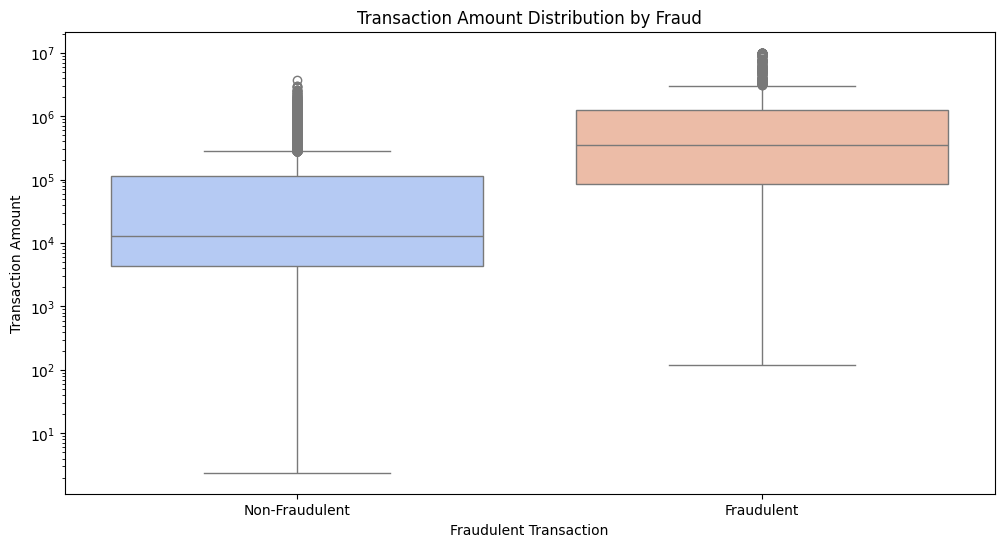

In [11]:
def plot_amount_distribution(data):
    """
    Plot the distribution of transaction amounts for fraudulent vs non-fraudulent transactions.
    """
    print("\nDescriptive statistics for fraudulent transactions")
    print(data[data['isFraud'] == 1]['amount'].describe())

    print("\nDescriptive statistics for non-fraudulent transactions")
    print(data[data['isFraud'] == 0]['amount'].describe())

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='isFraud', y='amount', data=data, palette='coolwarm')
    plt.title("Transaction Amount Distribution by Fraud")
    plt.xlabel("Fraudulent Transaction")
    plt.ylabel("Transaction Amount")
    plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
    plt.yscale('log')
    plt.show()
    
plot_amount_distribution(data)

In [12]:
def filter_fraudulent_transactions(data):
    """
    Filter the dataset to only include fraudulent transactions.
    """
    return data[data['isFraud'] == 1]

filter_fraudulent_transactions(data)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
1137,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1138,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1139,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1140,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1


In [13]:
def print_balance_statistics(data):
    """
    Print descriptive statistics for origin and destination balances in fraudulent transactions.
    """
    print("Origin Balances (Old and New) for Fraudulent Transactions:")
    print(data[['oldbalanceOrg', 'newbalanceOrig']].describe())

    print("\nDestination Balances (Old and New) for Fraudulent Transactions:")
    print(data[['oldbalanceDest', 'newbalanceDest']].describe())
    
print_balance_statistics(data)

Origin Balances (Old and New) for Fraudulent Transactions:
       oldbalanceOrg  newbalanceOrig
count   1.114200e+04    1.114200e+04
mean    9.241173e+05    8.249576e+05
std     2.143004e+06    2.089894e+06
min     0.000000e+00    0.000000e+00
25%     4.270000e+02    0.000000e+00
50%     2.816950e+04    4.420605e+03
75%     3.040855e+05    1.114126e+05
max     1.990000e+07    1.300000e+07

Destination Balances (Old and New) for Fraudulent Transactions:
       oldbalanceDest  newbalanceDest
count    1.114200e+04    1.114200e+04
mean     8.883541e+05    1.103211e+06
std      2.601376e+06    2.982447e+06
min      0.000000e+00    0.000000e+00
25%      0.000000e+00    0.000000e+00
50%      0.000000e+00    0.000000e+00
75%      2.711555e+05    3.186374e+05
max      3.300000e+07    3.460000e+07


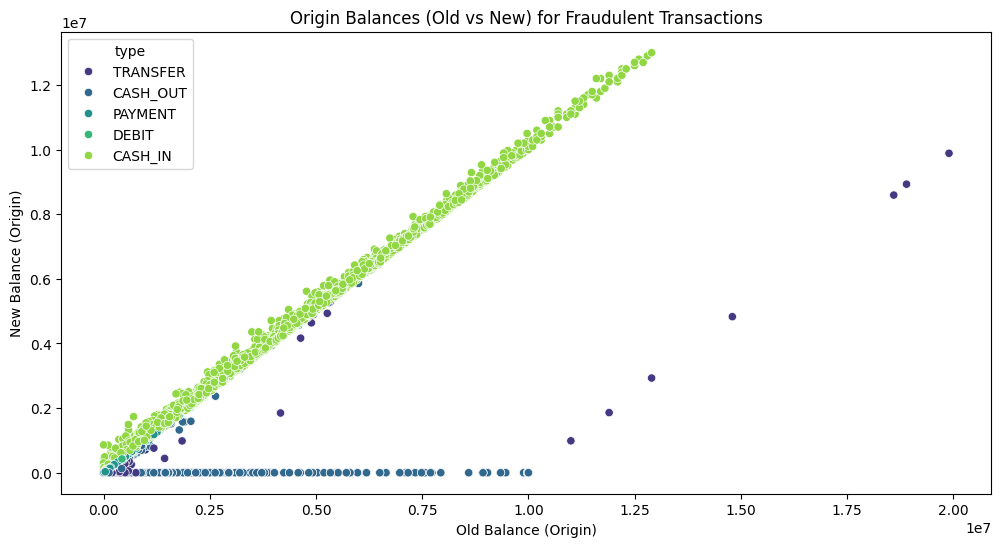

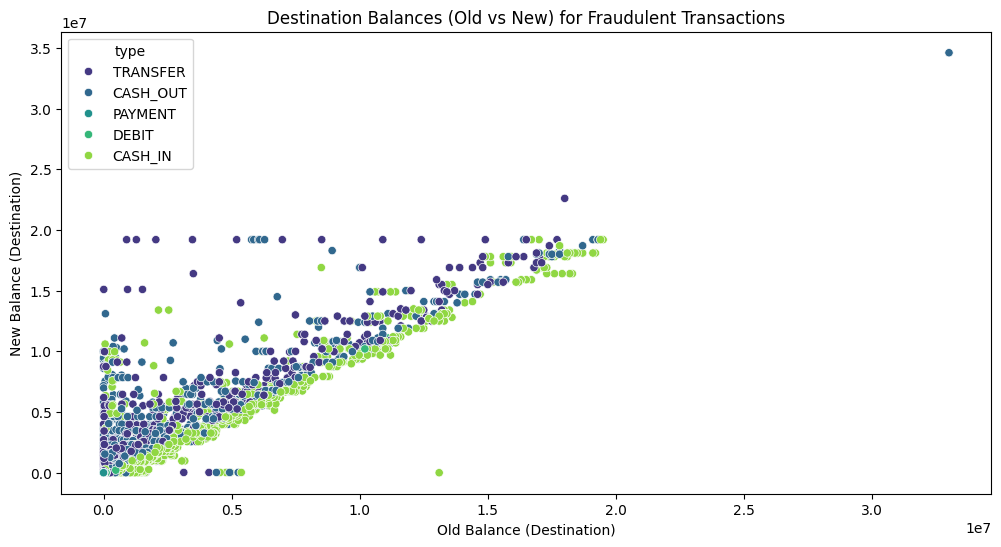

In [14]:
def plot_balance_scatterplots(data):
    """
    Plot scatterplots for origin and destination balances (old vs new) in fraudulent transactions.
    """
    # Scatter plot for origin balances (old vs new)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='type', data=data, palette='viridis')
    plt.title("Origin Balances (Old vs New) for Fraudulent Transactions")
    plt.xlabel("Old Balance (Origin)")
    plt.ylabel("New Balance (Origin)")
    plt.show()

    # Scatter plot for destination balances (old vs new)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='type', data=data, palette='viridis')
    plt.title("Destination Balances (Old vs New) for Fraudulent Transactions")
    plt.xlabel("Old Balance (Destination)")
    plt.ylabel("New Balance (Destination)")
    plt.show()
    
plot_balance_scatterplots(data)

Origin Balances (Old and New) for Fraudulent Transactions:
       oldbalanceOrg  newbalanceOrig
count   1.142000e+03    1.142000e+03
mean    1.218636e+06    3.394432e+04
std     2.229806e+06    5.012930e+05
min     0.000000e+00    0.000000e+00
25%     7.802889e+04    0.000000e+00
50%     3.487051e+05    0.000000e+00
75%     1.218166e+06    0.000000e+00
max     1.990000e+07    9.887819e+06

Destination Balances (Old and New) for Fraudulent Transactions:
       oldbalanceDest  newbalanceDest
count    1.142000e+03    1.142000e+03
mean     4.528661e+05    1.077940e+06
std      1.662232e+06    2.434195e+06
min      0.000000e+00    0.000000e+00
25%      0.000000e+00    0.000000e+00
50%      0.000000e+00    1.379876e+04
75%      1.617654e+05    9.685277e+05
max      3.300000e+07    3.460000e+07


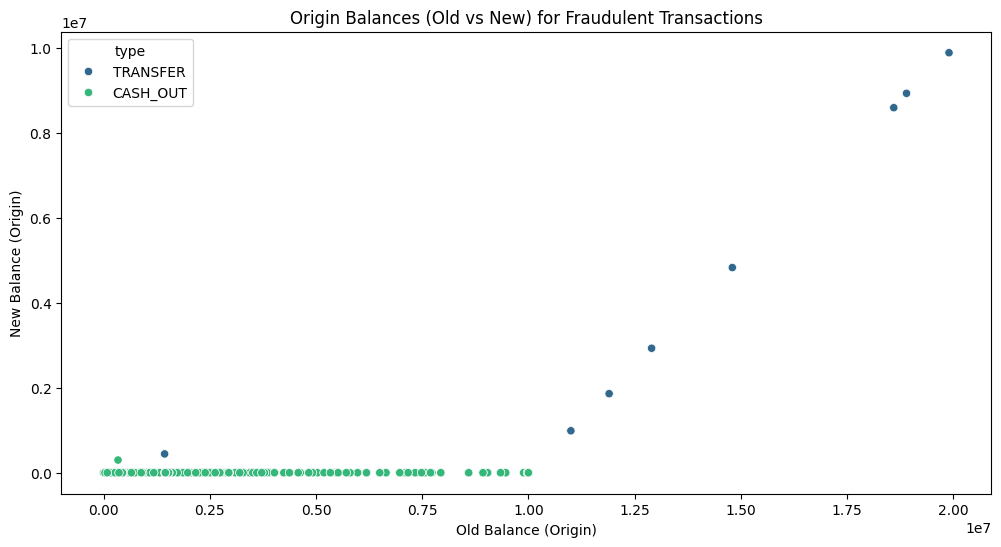

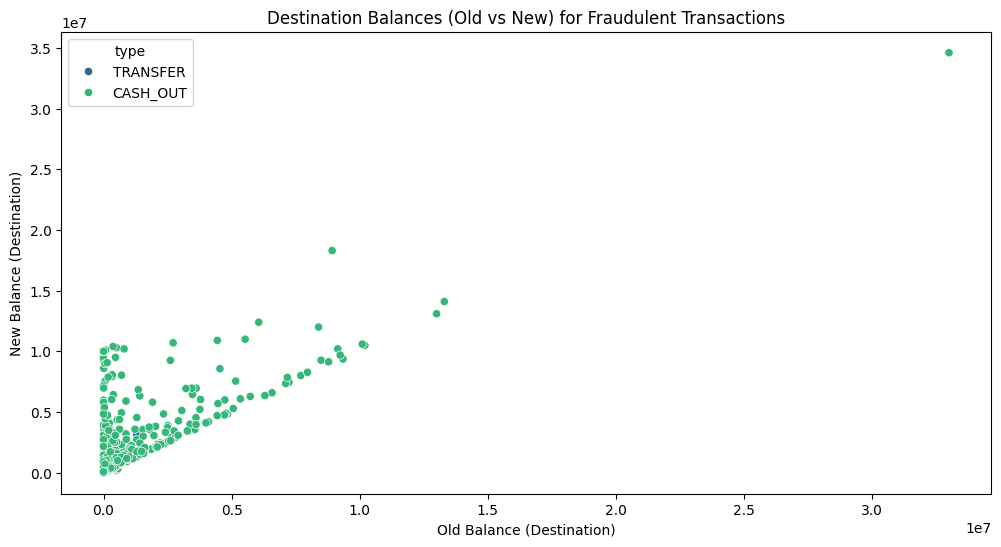

In [15]:
def analyze_fraudulent_transaction_balances(data):
    """
    Analyze the origin and destination balances for fraudulent transactions.
    """
    # Filter fraudulent transactions
    data = filter_fraudulent_transactions(data)

    # Print balance statistics for fraudulent transactions
    print_balance_statistics(data)

    # Plot scatterplots for origin and destination balances in fraudulent transactions
    plot_balance_scatterplots(data)
    
analyze_fraudulent_transaction_balances(data)

Correlation Matrix:
                   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000       0.323943       -0.007816        0.094117   
oldbalanceOrg   0.323943       1.000000        0.937024        0.207628   
newbalanceOrig -0.007816       0.937024        1.000000        0.234148   
oldbalanceDest  0.094117       0.207628        0.234148        1.000000   
newbalanceDest  0.227413       0.209787        0.190314        0.928831   
isFraud         0.435490       0.046445       -0.127912       -0.056575   

                newbalanceDest   isFraud  
amount                0.227413  0.435490  
oldbalanceOrg         0.209787  0.046445  
newbalanceOrig        0.190314 -0.127912  
oldbalanceDest        0.928831 -0.056575  
newbalanceDest        1.000000 -0.002864  
isFraud              -0.002864  1.000000  


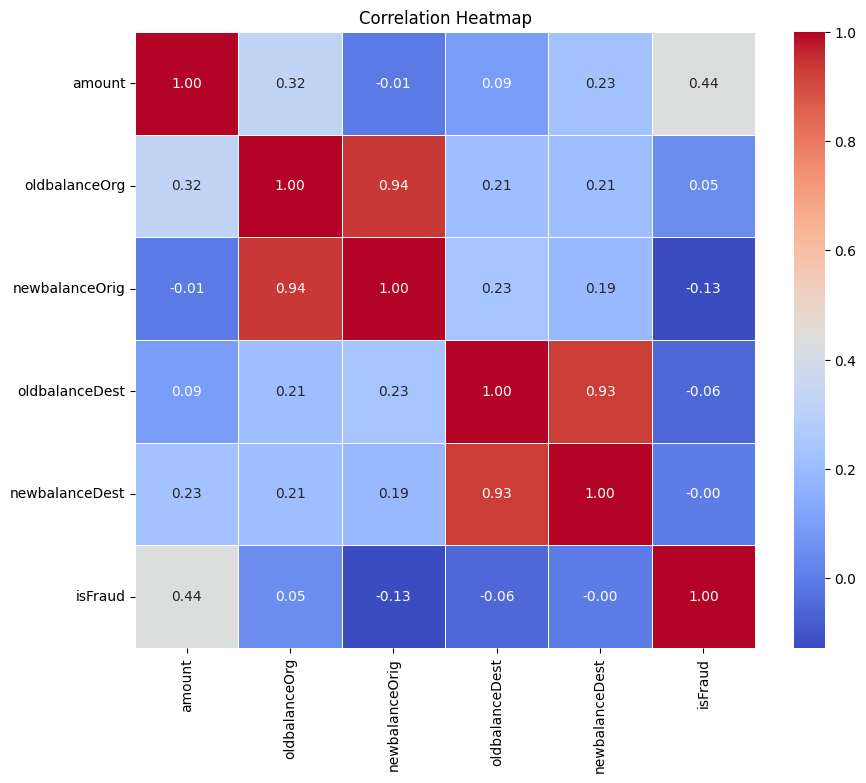

In [16]:
def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap for selected numeric columns.
    """
    numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
    correlation = data[numeric_cols].corr()
    print("Correlation Matrix:\n", correlation)

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()
    
plot_correlation_heatmap(data)

Merchant Transactions Overview:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  5510.000000   5510.000000   5.510000e+03    5.510000e+03   
mean      4.282033   7891.180686   8.731028e+04    8.256632e+04   
std       2.441388   7591.878233   3.449921e+05    3.444309e+05   
min       1.000000      2.390000   0.000000e+00    0.000000e+00   
25%       2.000000   2605.552500   4.712500e+02    0.000000e+00   
50%       5.000000   5772.735000   1.611146e+04    9.486340e+03   
75%       7.000000  10596.132500   5.257832e+04    4.672409e+04   
max       7.000000  68824.380000   6.489961e+06    6.485687e+06   

       oldbalanceDest  newbalanceDest  isFraud  
count          5510.0          5510.0   5510.0  
mean              0.0             0.0      0.0  
std               0.0             0.0      0.0  
min               0.0             0.0      0.0  
25%               0.0             0.0      0.0  
50%               0.0             0.0      0.0  
75%               0.

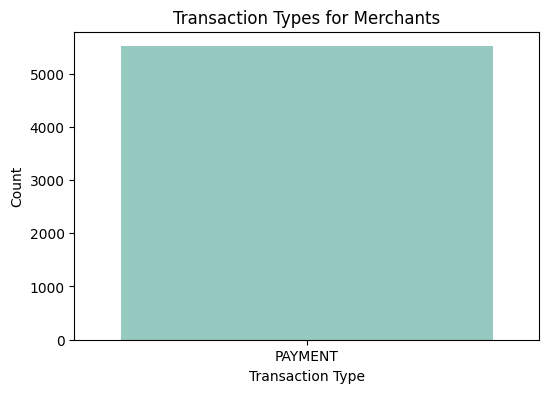

In [17]:
def analyze_merchant_transactions(data):
    """
    Analyze and plot merchant transactions based on the destination name starting with 'M'.
    """
    # Filter for merchant transactions
    merchant_data = data[data['nameDest'].str.startswith('M')]

    # Print descriptive statistics for merchant transactions
    print("Merchant Transactions Overview:\n", merchant_data.describe())

    # Plot the transaction types for merchants
    plt.figure(figsize=(6, 4))
    sns.countplot(x='type', data=merchant_data, palette='Set3')
    plt.title("Transaction Types for Merchants")
    plt.xlabel("Transaction Type")
    plt.ylabel("Count")
    plt.show()
    
analyze_merchant_transactions(data)

Step-wise Transaction Counts:
step
7     2914
1     2708
6     1660
2     1014
5      665
      ... 
54       4
28       4
49       4
29       4
23       2
Name: count, Length: 95, dtype: int64


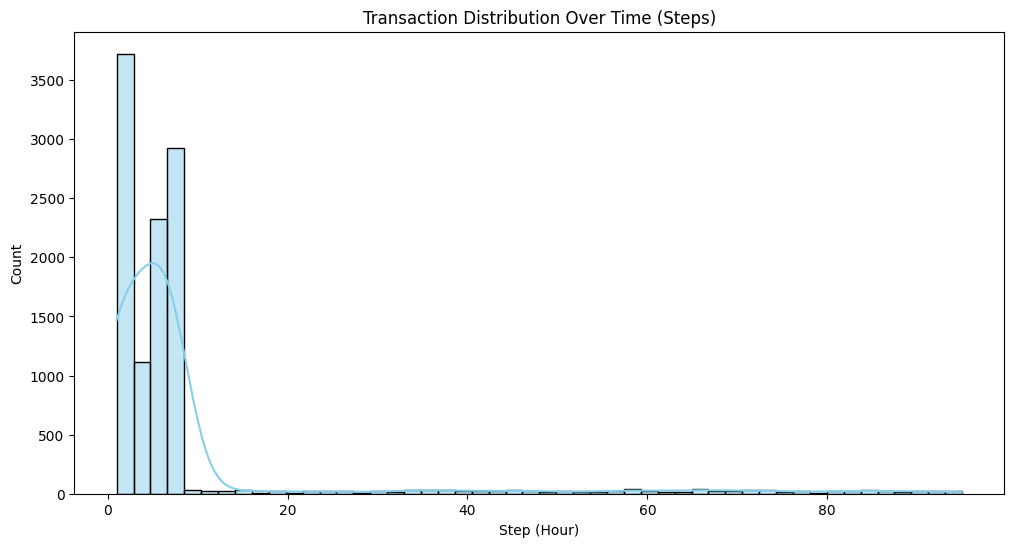

In [18]:
def plot_stepwise_transaction_distribution(data):
    """
    Plot the distribution of transactions over time (steps).
    """
    # Get the number of transactions at each step
    step_counts = data['step'].value_counts()

    # Print the step-wise transaction counts
    print("Step-wise Transaction Counts:")
    print(step_counts)

    # Plot the distribution of transactions over steps
    plt.figure(figsize=(12, 6))
    sns.histplot(data['step'], bins=50, kde=True, color='skyblue')
    plt.title("Transaction Distribution Over Time (Steps)")
    plt.xlabel("Step (Hour)")
    plt.ylabel("Count")
    plt.show()
    
plot_stepwise_transaction_distribution(data)

# 4. Feature Engineering

In [19]:
def feature_engineering(data):
    """
    Perform feature engineering: create new features and encode categorical variables.
    """
    encoder = LabelEncoder()
    data['type_encoded'] = encoder.fit_transform(data['type'])
    
    # Save the LabelEncoder
    joblib.dump(encoder, 'label_encoder.joblib')

    data['balanceOrig_diff'] = data['oldbalanceOrg'] - data['newbalanceOrig']
    data['balanceDest_diff'] = data['oldbalanceDest'] - data['newbalanceDest']
    data['amount_to_oldbalanceOrg_ratio'] = np.where(data['oldbalanceOrg'] > 0, data['amount'] / data['oldbalanceOrg'], 0)
    data['amount_to_oldbalanceDest_ratio'] = np.where(data['oldbalanceDest'] > 0, data['amount'] / data['oldbalanceDest'], 0)

    data['is_zero_oldbalanceOrg'] = (data['oldbalanceOrg'] == 0).astype(int)
    data['is_zero_newbalanceOrig'] = (data['newbalanceOrig'] == 0).astype(int)
    data['is_zero_oldbalanceDest'] = (data['oldbalanceDest'] == 0).astype(int)
    data['is_zero_newbalanceDest'] = (data['newbalanceDest'] == 0).astype(int)

    data['is_merchant'] = data['nameDest'].str.startswith('M').astype(int)

    columns_to_drop = ['type', 'nameOrig', 'nameDest']
    data.drop(columns=columns_to_drop, inplace=True)
    print(data.head())
    
    data.to_csv("processed_data.csv", index=False)
    print(f"Data saved to preproceed.csv")


    return data
feature_engineering(data)


   step   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1    181.0          181.0             0.0             0.0   
1     1    181.0          181.0             0.0         21182.0   
2     1   2806.0         2806.0             0.0             0.0   
3     1   2806.0         2806.0             0.0         26202.0   
4     1  20128.0        20128.0             0.0             0.0   

   newbalanceDest  isFraud  type_encoded  balanceOrig_diff  balanceDest_diff  \
0             0.0        1             4             181.0               0.0   
1             0.0        1             1             181.0           21182.0   
2             0.0        1             4            2806.0               0.0   
3             0.0        1             1            2806.0           26202.0   
4             0.0        1             4           20128.0               0.0   

   amount_to_oldbalanceOrg_ratio  amount_to_oldbalanceDest_ratio  \
0                            1.0                

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encoded,balanceOrig_diff,balanceDest_diff,amount_to_oldbalanceOrg_ratio,amount_to_oldbalanceDest_ratio,is_zero_oldbalanceOrg,is_zero_newbalanceOrig,is_zero_oldbalanceDest,is_zero_newbalanceDest,is_merchant
0,1,181.00,181.00,0.00,0.00,0.00,1,4,181.00,0.00,1.000000,0.000000,0,1,1,1,0
1,1,181.00,181.00,0.00,21182.00,0.00,1,1,181.00,21182.00,1.000000,0.008545,0,1,0,1,0
2,1,2806.00,2806.00,0.00,0.00,0.00,1,4,2806.00,0.00,1.000000,0.000000,0,1,1,1,0
3,1,2806.00,2806.00,0.00,26202.00,0.00,1,1,2806.00,26202.00,1.000000,0.107091,0,1,0,1,0
4,1,20128.00,20128.00,0.00,0.00,0.00,1,4,20128.00,0.00,1.000000,0.000000,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11137,7,6393.71,433084.38,426690.68,478421.00,210535.25,0,2,6393.70,267885.75,0.014763,0.013364,0,0,0,0,0
11138,7,298799.54,426690.68,127891.14,704355.36,5270364.19,0,1,298799.54,-4566008.83,0.700272,0.424217,0,0,0,0,0
11139,7,423159.63,127891.14,0.00,610479.00,749621.53,0,1,127891.14,-139142.53,3.308749,0.693160,0,1,0,0,0
11140,7,1094.03,13918.00,12823.97,0.00,0.00,0,3,1094.03,0.00,0.078605,0.000000,0,0,1,1,1


# 5. Data Preprocessing and Training

In [20]:
def preprocess_data(data):
    # Define features and target variable
    X = data.drop(columns=['isFraud'])
    y = data['isFraud']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Save the StandardScaler
    joblib.dump(scaler, 'standard_scaler.joblib')

    # Apply SMOTE to oversample the minority class (fraud)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    return X_train_resampled, y_train_resampled, X_test_scaled, y_test

X_train_resampled, y_train_resampled, X_test_scaled, y_test = preprocess_data(data)


# 6. Model evaluation

In [21]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluate and display performance metrics for a given model.
    """
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Return metrics for summary table
    return {
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
        "Accuracy": accuracy,
    }

In [22]:
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    evaluate_model(model, X_test_scaled, y_test, model_name)

In [23]:
# Dictionary of models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Evaluate all models and create a comparison table
results = []
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    metrics = evaluate_model(model, X_test_scaled, y_test, model_name)  # Evaluate
    results.append(metrics)  # Append metrics

# Convert results to a DataFrame for comparison
comparison_table = pd.DataFrame(results)

# Display the comparison table
print(comparison_table)

                 Model  Precision    Recall  F1 Score   ROC-AUC  Accuracy
0        Random Forest   1.000000  0.995614  0.997802  0.997807  0.999551
1                  SVC   0.921488  0.978070  0.948936  0.984287  0.989233
2  K-Nearest Neighbors   0.949367  0.986842  0.967742  0.990423  0.993271
3    Gradient Boosting   1.000000  0.995614  0.997802  0.997807  0.999551
4              XGBoost   0.995614  0.995614  0.995614  0.997557  0.999103


In [24]:
def generate_classification_report(model, X_test, y_test, model_name="Model"):
    """
    Generate and print the classification report for the given model.
    """
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Fit models and evaluate
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    generate_classification_report(model, X_test_scaled, y_test, model_name)



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      1.00      1.00       228

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229


SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2001
           1       0.92      0.98      0.95       228

    accuracy                           0.99      2229
   macro avg       0.96      0.98      0.97      2229
weighted avg       0.99      0.99      0.99      2229


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2001
           1       0.95      0.99      0.97       228

    accuracy                           0.99      2229
   macro avg      

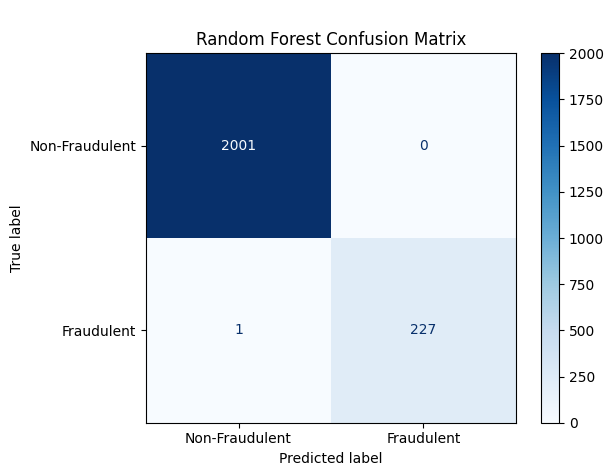

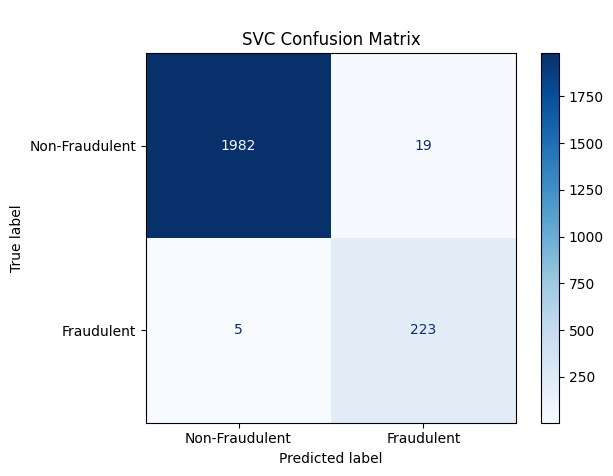

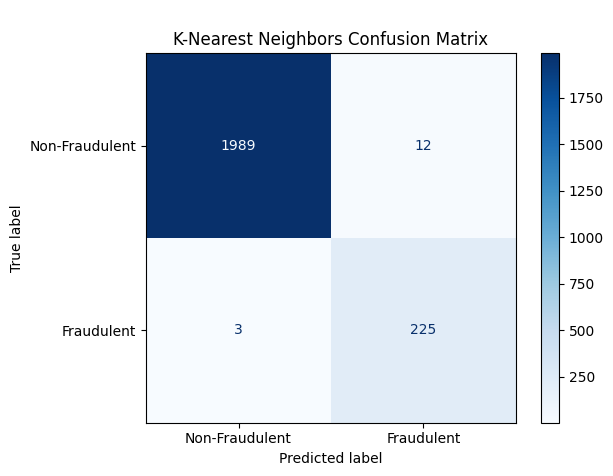

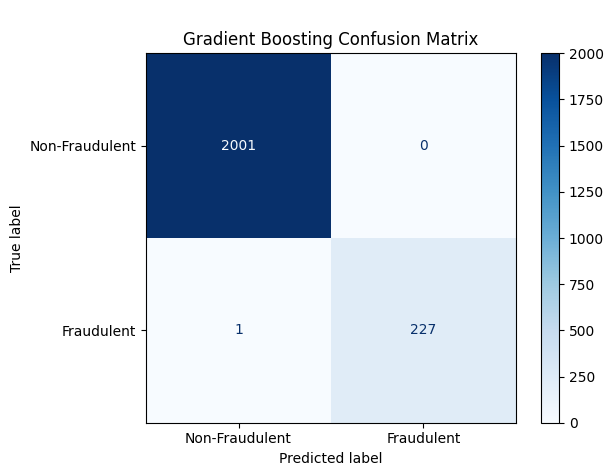

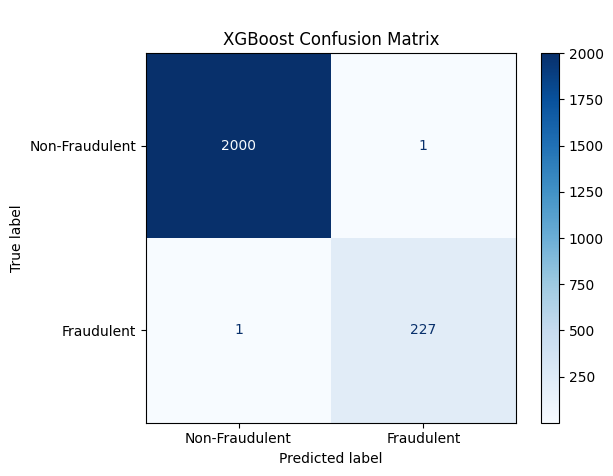

In [25]:
def generate_conf_matrix(model, X_test, y_test, model_name="Model"):
    """
    Generate and print the Confusion matrix for the given model.
    """
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Non-Fraudulent", "Fraudulent"])
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title(f"\n{model_name} Confusion Matrix")
    plt.show()

models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Fit models and evaluate
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    generate_conf_matrix(model, X_test_scaled, y_test, model_name)

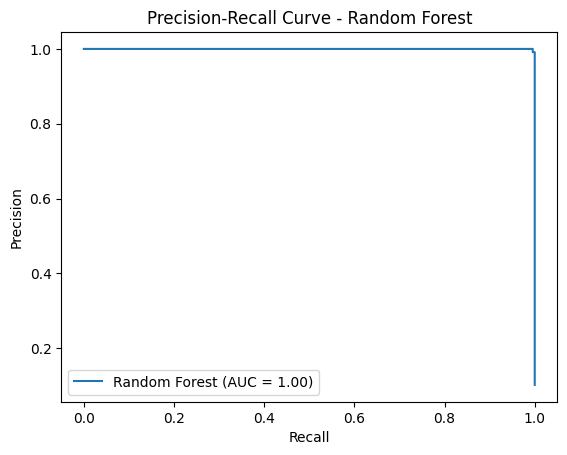

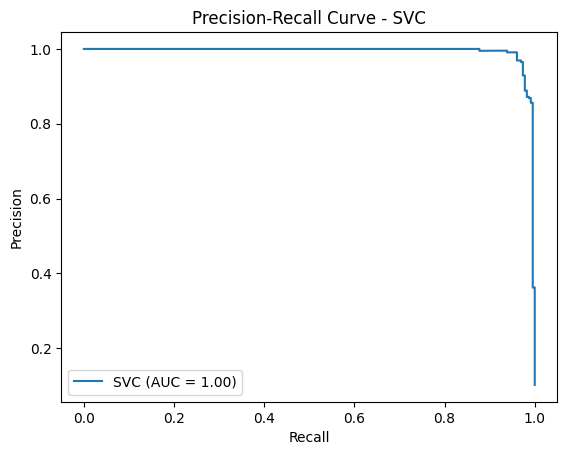

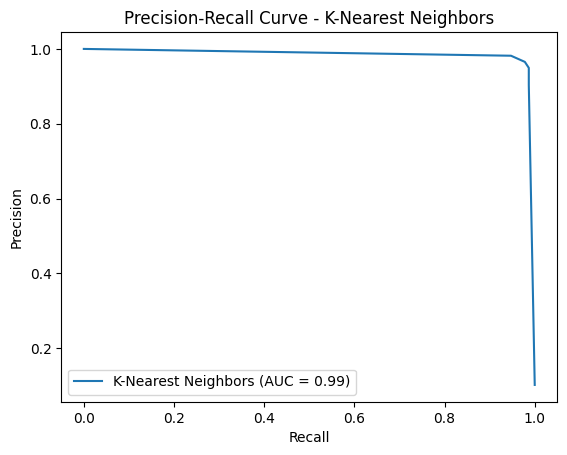

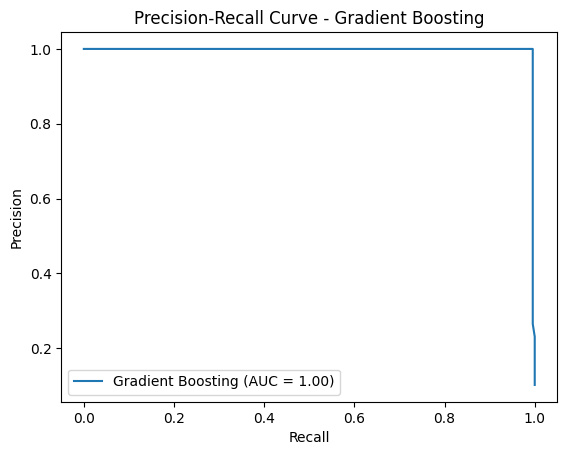

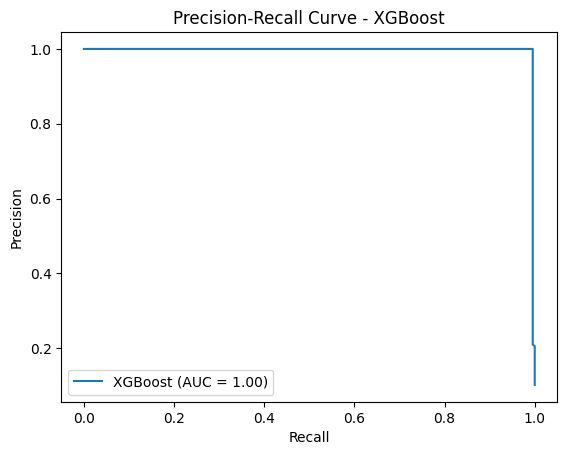

In [26]:
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    
    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()
    
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    plot_precision_recall_curve(model, X_test_scaled, y_test, model_name)

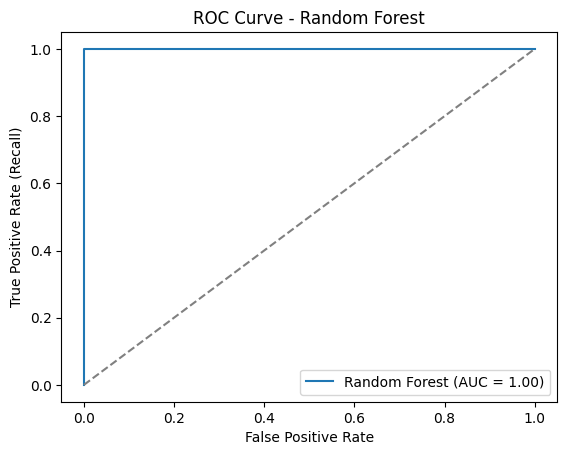

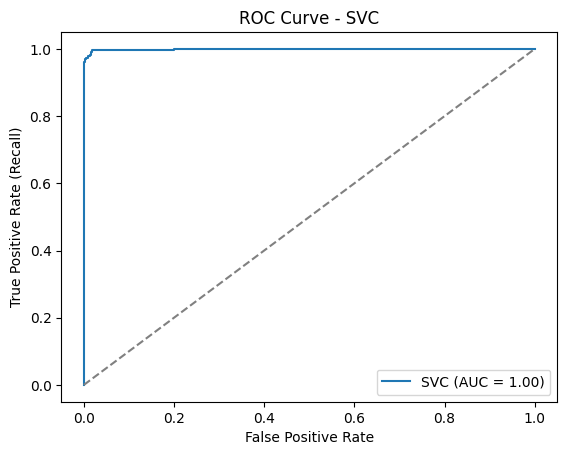

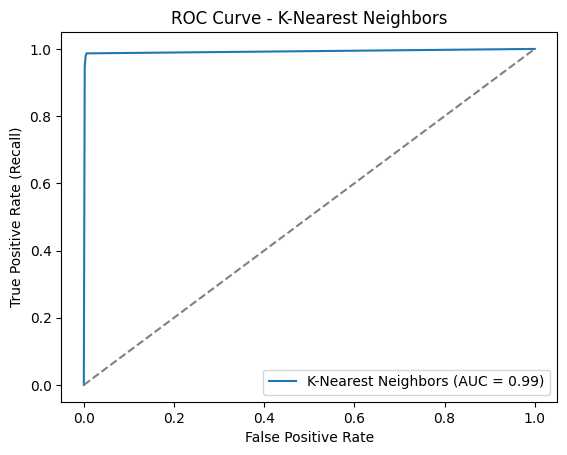

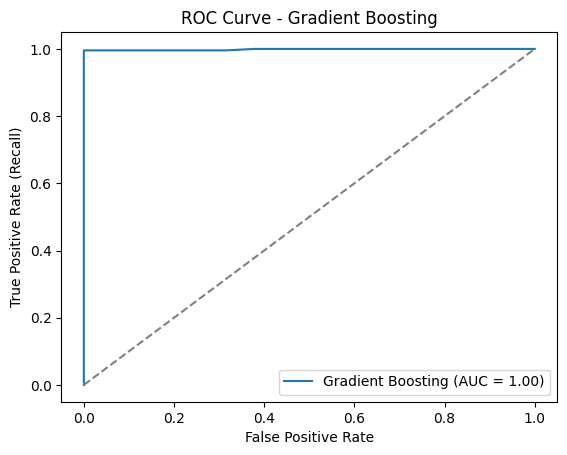

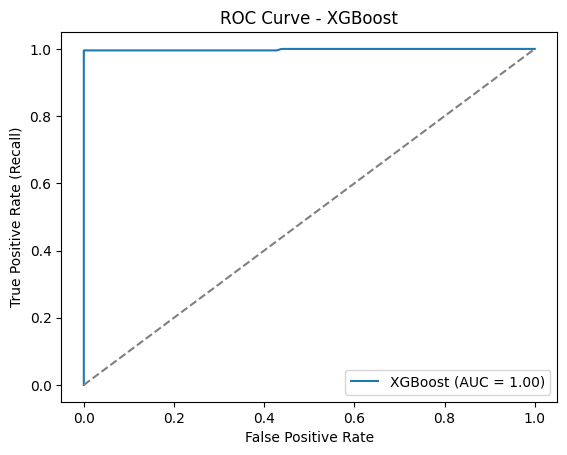

In [27]:
def plot_roc_curve(model, X_test, y_test, model_name):
    
    # Get predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()
    
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    plot_roc_curve(model, X_test_scaled, y_test, model_name)


In [28]:
from sklearn.model_selection import cross_validate

def evaluate_model_cv(model, model_name, X_train_resampled, y_train_resampled):
    """
    Evaluates the cross-validation scores for model using multiple scoring metrics.
    """
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(
        model, 
        X_train_resampled, 
        y_train_resampled, 
        cv=5, 
        scoring=scoring, 
        return_train_score=False
    )
    
    # Create a summary table
    cv_summary = {
        "Model": [model_name],
        "Mean Accuracy": [np.mean(cv_results['test_accuracy'])],
        "Mean Precision": [np.mean(cv_results['test_precision'])],
        "Mean Recall": [np.mean(cv_results['test_recall'])],
        "Mean F1-Score": [np.mean(cv_results['test_f1'])],
        "Mean ROC-AUC": [np.mean(cv_results['test_roc_auc'])],
        "Accuracy Std": [np.std(cv_results['test_accuracy'])],
        "Precision Std": [np.std(cv_results['test_precision'])],
        "Recall Std": [np.std(cv_results['test_recall'])],
        "F1-Score Std": [np.std(cv_results['test_f1'])],
        "ROC-AUC Std": [np.std(cv_results['test_roc_auc'])],
    }
    
    # Convert to DataFrame for better visualization
    cv_results_df = pd.DataFrame(cv_summary)
    print(f"\nCross-Validation Summary for {model_name}:")
    print(cv_results_df)
    
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Evaluate each model
for model_name, model in models.items():
    evaluate_model_cv(model, model_name, X_train_resampled, y_train_resampled)


Cross-Validation Summary for Random Forest:
           Model  Mean Accuracy  Mean Precision  Mean Recall  Mean F1-Score  \
0  Random Forest       0.999625             1.0      0.99925       0.999625   

   Mean ROC-AUC  Accuracy Std  Precision Std  Recall Std  F1-Score Std  \
0      0.999999      0.000364            0.0    0.000729      0.000365   

    ROC-AUC Std  
0  7.967050e-07  

Cross-Validation Summary for SVC:
  Model  Mean Accuracy  Mean Precision  Mean Recall  Mean F1-Score  \
0   SVC       0.990374        0.989279     0.991499       0.990385   

   Mean ROC-AUC  Accuracy Std  Precision Std  Recall Std  F1-Score Std  \
0      0.999635      0.001889       0.002573    0.002256      0.001884   

   ROC-AUC Std  
0     0.000092  

Cross-Validation Summary for K-Nearest Neighbors:
                 Model  Mean Accuracy  Mean Precision  Mean Recall  \
0  K-Nearest Neighbors       0.996437        0.994282     0.998625   

   Mean F1-Score  Mean ROC-AUC  Accuracy Std  Precision Std 

In [29]:
def evaluate_model_cv_table(model, model_name, X_train_resampled, y_train_resampled):
    """
    Evaluates the cross-validation scores for model using multiple scoring metrics.
    """
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(
        model, 
        X_train_resampled, 
        y_train_resampled, 
        cv=5, 
        scoring=scoring, 
        return_train_score=False
    )
    
    # Create a summary dictionary
    cv_summary = {
        "Model": model_name,
        "Mean Accuracy": np.mean(cv_results['test_accuracy']),
        "Mean Precision": np.mean(cv_results['test_precision']),
        "Mean Recall": np.mean(cv_results['test_recall']),
        "Mean F1-Score": np.mean(cv_results['test_f1']),
        "Mean ROC-AUC": np.mean(cv_results['test_roc_auc']),
        "Accuracy Std": np.std(cv_results['test_accuracy']),
        "Precision Std": np.std(cv_results['test_precision']),
        "Recall Std": np.std(cv_results['test_recall']),
        "F1-Score Std": np.std(cv_results['test_f1']),
        "ROC-AUC Std": np.std(cv_results['test_roc_auc']),
    }
    
    return cv_summary

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Accumulate cross-validation results
cv_comparison = []

for model_name, model in models.items():
    cv_summary = evaluate_model_cv_table(model, model_name, X_train_resampled, y_train_resampled)
    cv_comparison.append(cv_summary)

# Convert the comparison list into a DataFrame
cv_comparison_df = pd.DataFrame(cv_comparison)

# Display the comparison table
print("\nCross-Validation Comparison Table:")
print(cv_comparison_df)


Cross-Validation Comparison Table:
                 Model  Mean Accuracy  Mean Precision  Mean Recall  \
0        Random Forest       0.999625        1.000000     0.999250   
1                  SVC       0.990374        0.989279     0.991499   
2  K-Nearest Neighbors       0.996437        0.994282     0.998625   
3    Gradient Boosting       0.999312        1.000000     0.998625   
4              XGBoost       0.999437        0.999501     0.999375   

   Mean F1-Score  Mean ROC-AUC  Accuracy Std  Precision Std  Recall Std  \
0       0.999625      0.999999      0.000364       0.000000    0.000729   
1       0.990385      0.999635      0.001889       0.002573    0.002256   
2       0.996446      0.999406      0.000673       0.002183    0.001392   
3       0.999312      0.999993      0.000606       0.000000    0.001212   
4       0.999438      0.999998      0.000364       0.000728    0.000559   

   F1-Score Std   ROC-AUC Std  
0      0.000365  7.967050e-07  
1      0.001884  9.243341e-0

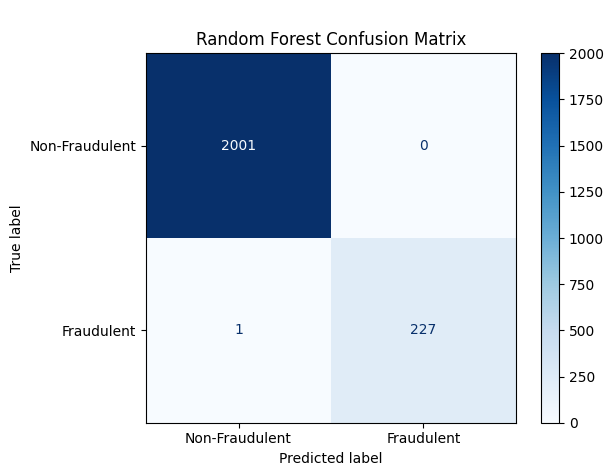

In [30]:
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
}

# Fit models and evaluate
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    generate_conf_matrix(model, X_test_scaled, y_test, model_name)


Cross-Validation Summary for Random Forest:
           Model  Mean Accuracy  Mean Precision  Mean Recall  Mean F1-Score  \
0  Random Forest       0.999625             1.0      0.99925       0.999625   

   Mean ROC-AUC  Accuracy Std  Precision Std  Recall Std  F1-Score Std  \
0      0.999999      0.000364            0.0    0.000729      0.000365   

    ROC-AUC Std  
0  7.967050e-07  

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2001
           1       1.00      1.00      1.00       228

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



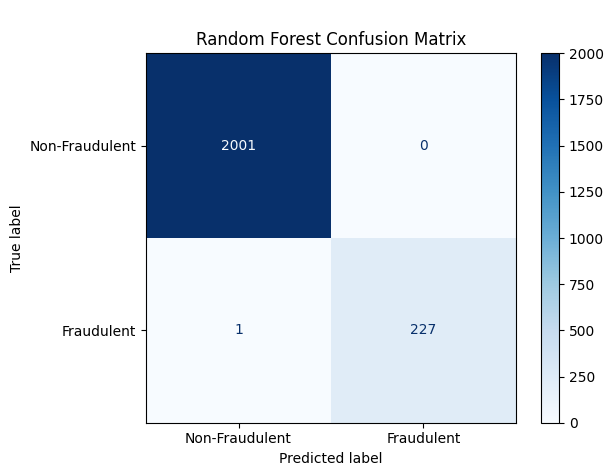

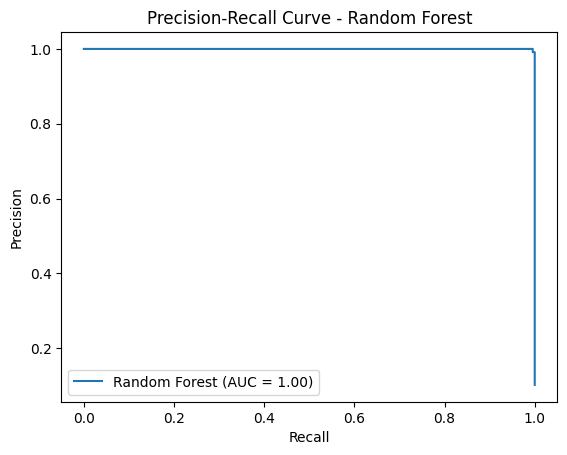

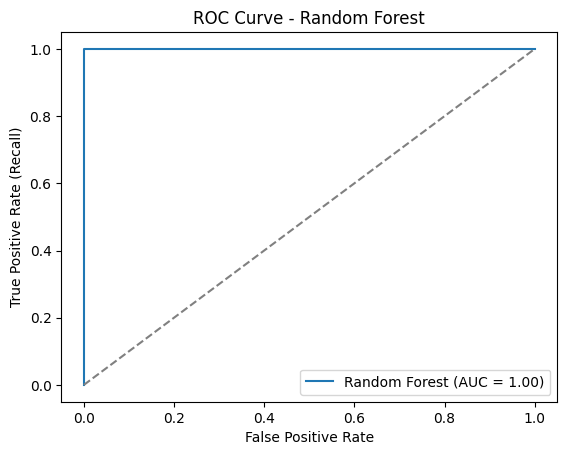

In [31]:
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
}

for model_name, model in models.items():
    evaluate_model_cv(model, model_name, X_train_resampled, y_train_resampled)    
    model.fit(X_train_resampled, y_train_resampled)
    evaluate_model(model, X_test_scaled, y_test, model_name)
    generate_classification_report(model, X_test_scaled, y_test, model_name)
    generate_conf_matrix(model, X_test_scaled, y_test, model_name)
    plot_precision_recall_curve(model, X_test_scaled, y_test, model_name)
    plot_roc_curve(model, X_test_scaled, y_test, model_name)


In [32]:
def generate_predictions_and_comparison(X_train_resampled, X_test, y_train_resampled, y_test):
    """
    Train a Random Forest model, generate predictions, and compare actual vs predicted values.
    """
    # Train a Random Forest model
    random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
    random_forest.fit(X_train_resampled, y_train_resampled)
    
    # Save the model
    joblib.dump(random_forest, 'random_forest_model.joblib')
    
    # Make predictions
    y_pred = random_forest.predict(X_test)
    
    # Create a DataFrame with required columns
    comparison_df = pd.DataFrame({
        "Actual Data": y_test,
        "Random Forest Predictions": y_pred,
        "Actual vs Random Forest Prediction": ["Match" if actual == pred else "Mismatch" for actual, pred in zip(y_test, y_pred)]
    })
    
    # Evaluate accuracy for confirmation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Model Accuracy: {accuracy:.4f}")
    
    return comparison_df

comparison_df = generate_predictions_and_comparison(X_train_resampled, X_test_scaled, y_train_resampled, y_test)
print(comparison_df.head())


Random Forest Model Accuracy: 0.9996
      Actual Data  Random Forest Predictions  \
4522            0                          0   
7816            0                          0   
1494            0                          0   
1713            0                          0   
1506            0                          0   

     Actual vs Random Forest Prediction  
4522                              Match  
7816                              Match  
1494                              Match  
1713                              Match  
1506                              Match  


In [33]:
def extract_mismatches(comparison_df):
    """
    Extract rows where actual prediction and Random Forest prediction do not match.
    """
    mismatches = comparison_df[comparison_df["Actual vs Random Forest Prediction"] == "Mismatch"]
    return mismatches

mismatches_df = extract_mismatches(comparison_df)
print(mismatches_df)
mismatches_df.shape

   Actual Data  Random Forest Predictions Actual vs Random Forest Prediction
6            1                          0                           Mismatch


(1, 3)

In [34]:
def add_amount_column(comparison_df, data):
    """
    Add the 'amount' column from the original dataset to the comparison DataFrame.
    """
    # Ensure the index of comparison_df matches the original DataFrame
    comparison_df["amount"] = data.loc[comparison_df.index, "amount"]
    
    # Save the resulting comparison DataFrame to a CSV file with the name "model predictions.csv"
    comparison_df.to_csv("model_predictions.csv", index=False)
    
    # Print confirmation message
    print(f"Data saved to model_predictions.csv")
    
    return comparison_df
comparison_df_with_amount = add_amount_column(comparison_df, data)
print(comparison_df_with_amount)


Data saved to model_predictions.csv
       Actual Data  Random Forest Predictions  \
4522             0                          0   
7816             0                          0   
1494             0                          0   
1713             0                          0   
1506             0                          0   
...            ...                        ...   
8005             0                          0   
11008            0                          0   
8187             0                          0   
10964            0                          0   
321              1                          1   

      Actual vs Random Forest Prediction     amount  
4522                               Match   23147.49  
7816                               Match   17978.87  
1494                               Match  100677.86  
1713                               Match    2056.59  
1506                               Match  161217.61  
...                                  ...        ...

# Financial Impact Analysis

In [35]:
# Random Forest Confusion Matrix Data
TP = 227  # True Positives
FP = 0    # False Positives
TN = 2001 # True Negatives
FN = 1    # False Negatives

# Financial Impact Parameters
cost_per_FP = 10         
cost_per_FN = 500       
recovered_amount_per_TP = 500 

# Financial Impact Analysis
cost_FP = FP * cost_per_FP
cost_FN = FN * cost_per_FN
revenue_TP = TP * recovered_amount_per_TP
net_profit = revenue_TP - (cost_FP + cost_FN)

# Evaluation Metrics
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0 
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


# Display Results
print(f"Financial Impact Analysis for Random Forest Model:")
print(f"Revenue Saved from Detected Fraud (TP): ${revenue_TP}")
print(f"Net Profit: ${net_profit}")

Financial Impact Analysis for Random Forest Model:
Revenue Saved from Detected Fraud (TP): $113500
Net Profit: $113000


Q1. What is the model's precision and accuracy in detecting fraudulent transactions? 

In [36]:
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Precision: 1.0
Accuracy: 0.9995513683266039


Q2. How reliable is the model in classifying transactions as legitimate or fraudulent? 

In [37]:
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")
print(f"Confusion Matrix:\n[[{TN} {FP}]\n [{FN} {TP}]]")

Recall: 0.9956140350877193
F1-Score: 0.9978021978021978
Confusion Matrix:
[[2001 0]
 [1 227]]


In [38]:
print("Legitimate Transactions: 100% correct classification")
print("Fraudulent Transactions: 99.56% correct classification")

Legitimate Transactions: 100% correct classification
Fraudulent Transactions: 99.56% correct classification


Q3. What are the potential losses due to model errors? 

In [39]:
# Random Forest Confusion Matrix Data
TP = 227  
FP = 0    
TN = 2001 
FN = 1    

# Financial Impact Parameters
cost_per_FP = 10        
cost_per_FN = 500       

# Financial Loss Analysis
loss_FP = FP * cost_per_FP  
loss_FN = FN * cost_per_FN  
potential_losses = loss_FP + loss_FN  

# Display Results
print(f"Potential Losses Due to Model Errors:")
print(f"Loss from False Positives (FP): ${loss_FP}")
print(f"Loss from Missed Fraud (FN): ${loss_FN}")
print(f"Total Potential Losses: ${potential_losses}")


Potential Losses Due to Model Errors:
Loss from False Positives (FP): $0
Loss from Missed Fraud (FN): $500
Total Potential Losses: $500


In [40]:
def load_model(model_path='random_forest_model.joblib'):
    # Load the model from the saved file
    model = joblib.load(model_path)
    return model

def generate_predictions_with_loaded_model(X_test_scaled):
    # Load the trained model
    model = load_model('random_forest_model.joblib')
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    return y_pred


y_pred = generate_predictions_with_loaded_model(X_test_scaled)
print(y_pred)


[0 0 0 ... 0 0 1]
